# SVM Assignment

- Support Vector Machine Classifier
- Support Vector Machine with Kernels Classifier

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

## Linear kernel 

### Data set

In [6]:
# run the following commands
# use generated (X, y) as the data set
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.0)

In [3]:
#pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. 
For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can (may not perfectly) discriminate between the two classes!

We can draw them as follows:

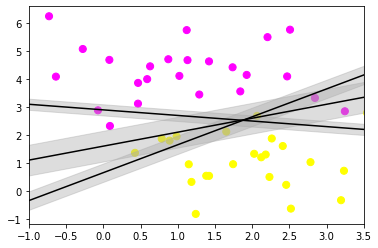

In [7]:
# run the following commands to plot
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Fitting a support vector machine

In [8]:
# here is an example of SVC
# run this cell
from sklearn.svm import SVC # "Support vector classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [9]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.reshape([xi, yj], (1, -1)))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

For an SVC called `clf`, command `clf.support_vectors_` will return all its support vectors.

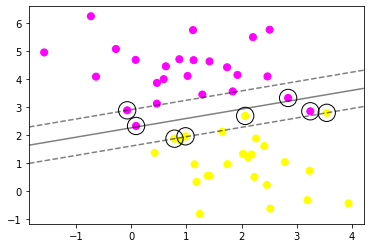

In [10]:
# here is the complete visialization of the 'example' SVC 'clf'
# run this cell
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, facecolors='none', edgecolors='k', linewidths=1);

### Your task:

For linear kernal:

1. use **5-fold** cross validation to perform grid search to calculate optimal hyper-parameters
2. the values of possible $C$ are in list: [$2^i$ for $i$ in range(10)]
3. find the **best params** & corresponding **best estimator** & the total number of support vectors of the best estimator
4. plot the complete visialization of the best estimator (similar graph as the previous example)

Note: use `one-vs-rest` decision function!

In [11]:
# import GridSerarchCV & classification_report
# Your code here
# Two-line codes

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Set the parameters for cross-validation
# Your code here
# One-line code 
# Hint: 'C': [2**i for i in range(10)]
parameters = [ {'kernel': ['linear'], 'gamma':['auto'],'C': [2**i for i in range(10)]}]

In [13]:
# run gridsearch-cross_validation then fit the data
# Your code here
# Two-line codes
# hint: use GridSearchCV()

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print( clf.best_params_ )
      # Your code here -- print best parameters)
print()
print("Best estimator found on development set:")
print()
print( clf.best_estimator_)
# Your code here -- print best estimator)
print()
print("Number of the support vectors of the best estimator:")
print()
print(clf.best_estimator_.n_support_)
# Your code here -- print the number of support vectors)
print()

Best parameters set found on development set:

{'C': 4, 'gamma': 'auto', 'kernel': 'linear'}

Best estimator found on development set:

SVC(C=4, gamma='auto', kernel='linear')

Number of the support vectors of the best estimator:

[3 3]



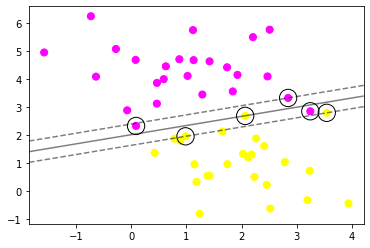

In [14]:
# plot the original data + decision boundary + support vectors
# Your code here
# Three-line codes
# Hint: see previous example

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1],
            s=300, facecolors='none', edgecolors='k', linewidths=1);


# KNN Assignment

Follow the analysis procedure above, **Change data set to iris, use the latter two features instead of the first two**. Use `GridSearchCV` with `[5,10,15]`-folds and `n_neighbors = list(range(1, 50, 2))` to find the best (fold, neighbor) combination, which gives the highest `mean_test_score`.

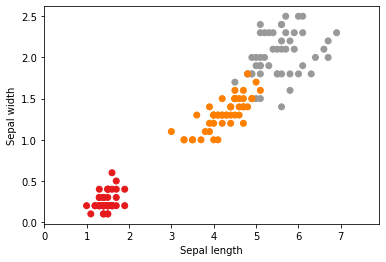

In [15]:
from sklearn import neighbors
from sklearn.utils import shuffle

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, -2:] # we only take the last two features.
y = iris.target

X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# plot X into 2-D graph
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max);

In [16]:
fold = [5,10,15] 

parameters = [ {'n_neighbors': [i for i in range(1,50,2)]}]

In [21]:
for f in fold:
    #clf = GridSearchCV(neighbors.KNeighborsClassifier(), parameters, cv=f, iid = True)
    clf = GridSearchCV(neighbors.KNeighborsClassifier(), parameters, cv=f)
    clf.fit(X_train, y_train)

    print("For fold =",f,',',"best parameters set found on development set:",clf.best_params_)
    print()
    print("Grid scores on training set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

For fold = 5 , best parameters set found on development set: {'n_neighbors': 17}

Grid scores on training set:
0.958 (+/-0.105) for {'n_neighbors': 1}
0.950 (+/-0.097) for {'n_neighbors': 3}
0.958 (+/-0.091) for {'n_neighbors': 5}
0.958 (+/-0.091) for {'n_neighbors': 7}
0.958 (+/-0.091) for {'n_neighbors': 9}
0.958 (+/-0.091) for {'n_neighbors': 11}
0.958 (+/-0.091) for {'n_neighbors': 13}
0.967 (+/-0.097) for {'n_neighbors': 15}
0.975 (+/-0.067) for {'n_neighbors': 17}
0.975 (+/-0.067) for {'n_neighbors': 19}
0.975 (+/-0.067) for {'n_neighbors': 21}
0.975 (+/-0.067) for {'n_neighbors': 23}
0.975 (+/-0.067) for {'n_neighbors': 25}
0.967 (+/-0.097) for {'n_neighbors': 27}
0.967 (+/-0.097) for {'n_neighbors': 29}
0.958 (+/-0.091) for {'n_neighbors': 31}
0.967 (+/-0.097) for {'n_neighbors': 33}
0.958 (+/-0.091) for {'n_neighbors': 35}
0.967 (+/-0.062) for {'n_neighbors': 37}
0.958 (+/-0.091) for {'n_neighbors': 39}
0.975 (+/-0.067) for {'n_neighbors': 41}
0.967 (+/-0.097) for {'n_neighbor